In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
page = urlopen('https://www.melon.com/chart/day/index.htm') # 멜론 Top 100 페이지 가져옴
soup = BeautifulSoup(page, 'html.parser')
song_list = soup.find(class_='service_list_song').tbody.find_all('tr')
#song_list

In [2]:
daily_song_chart = []

for song in song_list: # 각 노래 정보 가져오기
    rank = song.find(class_ = 'rank').text
    updown = song.find(class_ = 'rank_wrap').text.split('\n')[2]    
    title = song.find('div', class_='rank01').a.text
    singer = song.find('div', class_='rank02').a.text
    album_name = song.find(class_='rank03').a.text

    song_num = song['data-song-no']
    print(song_num)
  #  url = 'https://www.melon.com/song/detail.htm?songId=' + song_num
  #  song_page = urlopen(url)
  #  soup = BeautifulSoup(song_page, 'html.parser')
  #  release_date = soup.find(class_ = 'list').find_all('dd')[1].text

    if updown == "" :
        updown = 0
        
    daily_song_chart.append([int(rank), abs(int(updown)), title, singer, album_name]) #, release_date])
    
    print('순위 : ', rank)
    print('변동폭 : ', updown)
    print('제목 : ', title)
    print('가수 : ', singer)
    print('앨범명 : ', album_name)
   # print('발매일 : ', release_date)
    print()

30948698
순위 :  1
변동폭 :  0
제목 :  꽃 길
가수 :  BIGBANG
앨범명 :  꽃 길

30937275
순위 :  2
변동폭 :  0
제목 :  별이 빛나는 밤
가수 :  마마무
앨범명 :  Yellow Flower

30939452
순위 :  3
변동폭 :  0
제목 :  Jenga (Feat. Gaeko)
가수 :  헤이즈 (Heize)
앨범명 :  바람

30859584
순위 :  4
변동폭 :  0
제목 :  사랑을 했다 (LOVE SCENARIO)
가수 :  iKON
앨범명 :  Return

30816860
순위 :  5
변동폭 :  0
제목 :  뿜뿜
가수 :  모모랜드 (MOMOLAND)
앨범명 :  GREAT!

30755375
순위 :  6
변동폭 :  0
제목 :  그날처럼
가수 :  장덕철
앨범명 :  그날처럼

30939454
순위 :  7
변동폭 :  0
제목 :  내가 더 나빠
가수 :  헤이즈 (Heize)
앨범명 :  바람

30884950
순위 :  8
변동폭 :  0
제목 :  그때 헤어지면 돼
가수 :  로이킴
앨범명 :  그때 헤어지면 돼

30864993
순위 :  9
변동폭 :  0
제목 :  Bad Boy
가수 :  Red Velvet (레드벨벳)
앨범명 :  The Perfect Red Velvet - The 2nd Album Repackage

8111603
순위 :  10
변동폭 :  0
제목 :  HandClap
가수 :  Fitz & The Tantrums
앨범명 :  Fitz and The Tantrums (Deluxe)

30844118
순위 :  11
변동폭 :  0
제목 :  Roller Coaster
가수 :  청하
앨범명 :  Offset

30567963
순위 :  12
변동폭 :  0
제목 :  Havana (Feat. Young Thug)
가수 :  Camila Cabello
앨범명 :  Camila

30514366
순위 :  13
변동폭 :  0
제목 :  선물
가수

In [3]:
page = urlopen('https://www.melon.com/chart/vdo/index.htm') # 동영상 차트 페이지
soup = BeautifulSoup(page, 'html.parser')
video_list = soup.find(class_='d_video_list').find_all('li', class_='lst50')
video_list += soup.find(class_='d_video_list').find_all('li', class_='lst100')

In [4]:
video_infos = []

for video in video_list: # 각 동영상 정보 가져오기
    info = video.find(class_ = 'entry')
    
    ranking = video.find(class_='wrap_rank').span.text
    artist_name = video.find(class_='info').find(class_="artist_name").text
    title = info.find(class_='info').a.text.replace("[MV]","")
    rating = video.find(class_='bullet_icons').find(class_='none').text.replace("세 이상 이용가능", "").strip('"')

    if rating.split(" ")[0] == '단계' or rating.split(" ")[0] == '순위' or rating == '전체 이용가능':
        rating = 0
    
    video_infos.append([int(ranking), artist_name, title, int(rating)])

In [5]:
video_infos[:10]

[[1, '헤이즈 (Heize)', '[Special Clip] 헤이즈 (Heize) - 내가 더 나빠', 0],
 [2, '마마무', '별이 빛나는 밤', 15],
 [3, '모모랜드 (MOMOLAND)', '뿜뿜', 12],
 [4, 'Wanna One (워너원)', '약속해요 (I.P.U.)', 0],
 [5, 'DPR LIVE', '[썰렘코드] DPR LIVE - Action! (Feat. GRAY)', 0],
 [6, '헤이즈 (Heize)', 'Jenga (Feat. Gaeko)', 15],
 [7, 'GOT7 (갓세븐)', 'Look', 12],
 [8, 'NCT 127', 'TOUCH', 12],
 [9, 'NCT U', 'BOSS', 15],
 [10, 'Red Velvet (레드벨벳)', 'Bad Boy', 12]]

In [6]:
import pandas as pd

# 동영상 차트 정보를 담는 데이터 프레임
video_frame = pd.DataFrame(video_infos, columns=['멜론_동영상_랭킹', '멜론_아티스트', '멜론_제목', '멜론_등급'])

In [7]:
video_frame.head()

,멜론_동영상_랭킹,멜론_아티스트,멜론_제목,멜론_등급
0,1,헤이즈 (Heize),[Special Clip] 헤이즈 (Heize) - 내가 더 나빠,0
1,2,마마무,별이 빛나는 밤,15
2,3,모모랜드 (MOMOLAND),뿜뿜,12
3,4,Wanna One (워너원),약속해요 (I.P.U.),0
4,5,DPR LIVE,[썰렘코드] DPR LIVE - Action! (Feat. GRAY),0


In [8]:
video_frame.to_csv('../../data/melon_video.csv', sep=',', encoding='utf-8', index=False)
# 데이터 프레임을 csv 파일로 저장

In [9]:
# csv에서 데이터 프레임 가져올 때 사용
# load_video = pd.read_csv('../../data/melon_video.csv', thousands=',', encoding='utf-8')
# load_video.head()

In [10]:
#노래 차트 데이터 프레임으로 만들기
songs_frame = pd.DataFrame(daily_song_chart, columns=['랭킹', '멜론_등락', '멜론_제목', '멜론_가수', '멜론_앨범'])
songs_frame.head()

,랭킹,멜론_등락,멜론_제목,멜론_가수,멜론_앨범
0,1,0,꽃 길,BIGBANG,꽃 길
1,2,0,별이 빛나는 밤,마마무,Yellow Flower
2,3,0,Jenga (Feat. Gaeko),헤이즈 (Heize),바람
3,4,0,사랑을 했다 (LOVE SCENARIO),iKON,Return
4,5,0,뿜뿜,모모랜드 (MOMOLAND),GREAT!


In [11]:
# 노래 제목을 기준으로 노래와 동영상 차트를 합친다.
data_result = pd.merge(songs_frame, video_frame, on='멜론_제목')
data_result.head()

,랭킹,멜론_등락,멜론_제목,멜론_가수,멜론_앨범,멜론_동영상_랭킹,멜론_아티스트,멜론_등급
0,2,0,별이 빛나는 밤,마마무,Yellow Flower,2,마마무,15
1,3,0,Jenga (Feat. Gaeko),헤이즈 (Heize),바람,6,헤이즈 (Heize),15
2,4,0,사랑을 했다 (LOVE SCENARIO),iKON,Return,16,iKON,12
3,5,0,뿜뿜,모모랜드 (MOMOLAND),GREAT!,3,모모랜드 (MOMOLAND),12
4,7,0,내가 더 나빠,헤이즈 (Heize),바람,24,헤이즈 (Heize),12


In [12]:
import numpy as np

np.corrcoef(data_result['랭킹'], data_result['멜론_동영상_랭킹'])
#곡의 노래 차트 순위와 동영상 순위는 관계가 있다.

array([[1.        , 0.47597305],
       [0.47597305, 1.        ]])

In [13]:
import platform #os 정보를 가져 올 수 있는 모듈
from matplotlib import font_manager, rc # font_manager : 폰트 관리 모듈, rc : 폰트 변경 모듈
from matplotlib import pyplot as plt # 시각화 도구
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False # 유니코드 표현 설정하기

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # OS가 APPLE(Darwin)이면 AppleGothic으로 폰트 설정
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf" #OS가 윈도우즈면 맑은 고딕으로 설정
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System.')

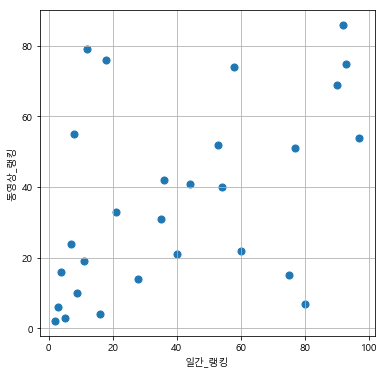

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['랭킹'], data_result['멜론_동영상_랭킹'], s=50)
plt.xlabel('일간_랭킹')
plt.ylabel('동영상_랭킹')
plt.grid()
plt.show()

In [15]:
fp1 = np.polyfit(data_result['랭킹'], data_result['멜론_동영상_랭킹'], 1)
fp1

array([ 0.39213411, 20.66688283])

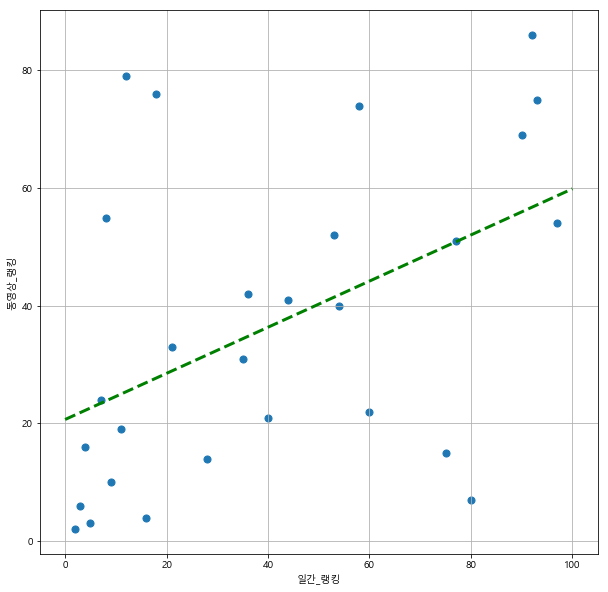

In [16]:
f1 = np.poly1d(fp1)
fx = np.linspace(0, 100, 100)
plt.figure(figsize=(10,10))
plt.scatter(data_result['랭킹'], data_result['멜론_동영상_랭킹'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('일간_랭킹')
plt.ylabel('동영상_랭킹')
plt.grid()
plt.show()

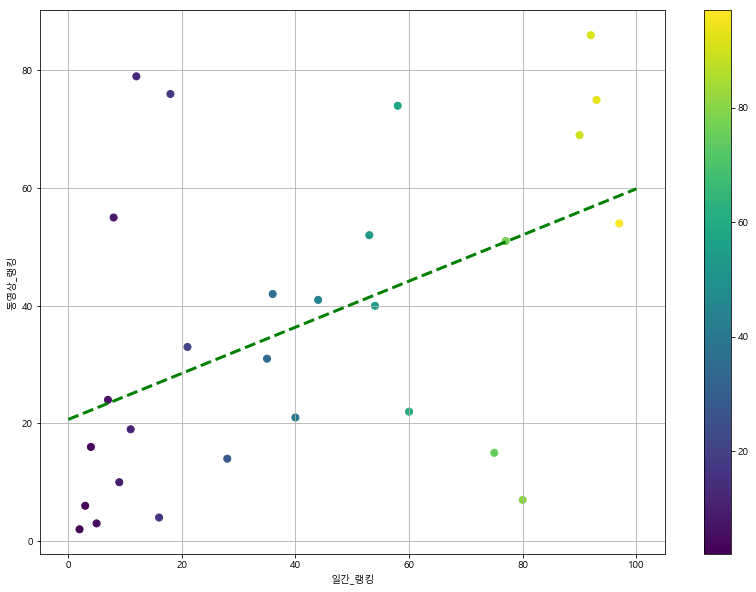

In [17]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['랭킹'], data_result['멜론_동영상_랭킹'],c=data_result['랭킹'], s=50) 
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g') 
#오차가 가장 큰 10개의 구에 대해서 텍스트 부여하기 
# for n in range(10):     
#     plt.text(bugs['순위'][n]*1.02,  bugs['bugs_mv_순위'][n] * 0.98, bugs.index[n], fontsize=15)  

plt.xlabel('일간_랭킹')
plt.ylabel('동영상_랭킹')
plt.colorbar() 
plt.grid()
plt.show()